# 02e - TS1 Skeletonization

## Setup

In [1]:
from discos import *
import numpy as np
import trimesh

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Load TS2 Mesh

In [2]:
# Load the TS2 mesh from the data directory
mesh_path = data_path("mesh/processed/TS1_wrapped.obj")

ts = trimesh.load(mesh_path)

mm = MeshManager(mesh=ts)
mm.print_mesh_analysis()
mm.align_furthest_points_with_z()
mm.repair_mesh_pymeshfix()
mm.visualize_mesh_slice_interactive()


In [3]:
# save repaired mesh to new file
# mm.save(data_path("mesh/processed/TS1_repaired.obj"), file_format="obj")

## Skeleton

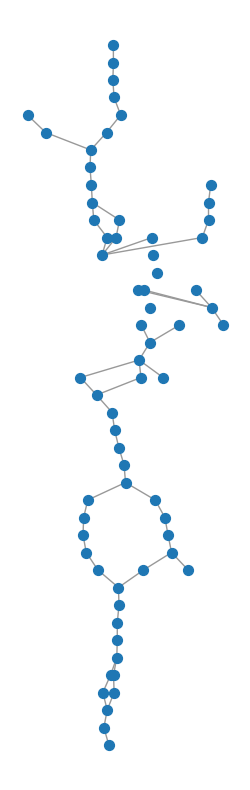

In [ ]:
n_slices = 40
ps = PolylinesSkeleton.from_txt(data_path("polylines/TS1.polylines.txt"))
guidance = PolylineGuidanceConfig(use_guidance=True, snap_polylines_to_mesh=True, )
G = skeletonize(mm, n_slices=n_slices, verbosity=2, enforce_connected=False, polylines=ps, guidance=guidance)
G.draw(figsize=(10, 10))
G.plot_all_cross_sections();

In [5]:
# write swc to file
G.to_swc(data_path(f"swc/TS1_n{n_slices}.swc"), cycle_mode="duplicate_junction")

Success for n=3
Success for n=5
Error for n=7: SkeletonGraph has 2 connected components, but a single connected component is required. Re-check mesh integrity or call skeletonize(..., enforce_connected=False) to bypass.
Success for n=9
Success for n=11
Error for n=13: SkeletonGraph has 5 connected components, but a single connected component is required. Re-check mesh integrity or call skeletonize(..., enforce_connected=False) to bypass.
Error for n=15: SkeletonGraph has 3 connected components, but a single connected component is required. Re-check mesh integrity or call skeletonize(..., enforce_connected=False) to bypass.
Error for n=17: SkeletonGraph has 3 connected components, but a single connected component is required. Re-check mesh integrity or call skeletonize(..., enforce_connected=False) to bypass.
Error for n=19: SkeletonGraph has 5 connected components, but a single connected component is required. Re-check mesh integrity or call skeletonize(..., enforce_connected=False) to

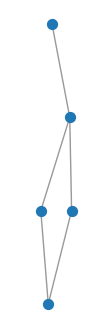

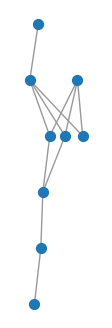

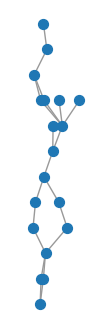

In [6]:
# test skeletonization for multiple values of n_slices
n_list = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
for n in n_list:
    try:
        skel = skeletonize(mm, n_slices=n, verbosity=1)
    except Exception as e:
        print(f"Error for n={n}: {e}")
    else:
        print(f"Success for n={n}")
        skel.draw()